# DATA ANALYSIS PYTHON PROJECT - BLINKIT ANALYSIS

#### **Import Libraries**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import Dataset 

In [5]:
df=pd.read_csv("blinkit_data.csv")


In [6]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [7]:
df.tail()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
8518,low fat,NCT53,Health and Hygiene,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0
8522,reg,FDM58,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,112.2544,4.0


In [10]:
df.shape #rows and columns

(8523, 12)

In [12]:
df.columns   #field information 

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [16]:
df.dtypes #datatypes of columns

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

### Data Cleaning

In [21]:
print(df['Item Fat Content'].unique())  #checking what are the unique data in this column

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [26]:
df['Item Fat Content']=df['Item Fat Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})  #we are using thr replace function and replacing the values

In [25]:
print(df['Item Fat Content'].unique()) 

['Regular' 'Low Fat']


### Business Requirements

### KPI's Requirements

In [32]:
#Total Sales
total_sales = df['Sales'].sum()
#Average Sales
avg_sales =df['Sales'].mean()
#No. of Items Sold 
no_of_items_sold =df['Sales'].count()
#Average Rating
avg_ratings = df['Rating'].mean()

#Output 
print(total_sales)

1201681.4808


In [43]:
#Display Of KPI's
print(f"Total Sales: ${total_sales:,.0f}")
# ,.0f means- ","- is gives 1000's of separater , .0f means it will give you result in whole no. , removes all the float values
print(f"Average Sales: ${avg_sales:,.0f}")
print(f"No. of Items Sold: {no_of_items_sold:,.0f}")
print(f"Average Ratings: {avg_ratings:,.1f}") #.1f gives 1 float value

Total Sales: $1,201,681
Average Sales: $141
No. of Items Sold: 8,523
Average Ratings: 4.0


### Charts Requirements

#### Total Sales by Fat Content

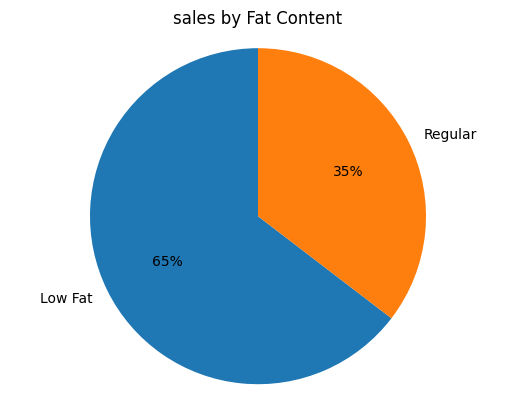

In [50]:
sales_by_fat= df.groupby('Item Fat Content')['Sales'].sum()
plt.pie(sales_by_fat,labels = sales_by_fat.index,
        autopct='%.0f%%',
        startangle=90)
plt.title('sales by Fat Content')
plt.axis('equal')
plt.show()

### Total sales by Item Type

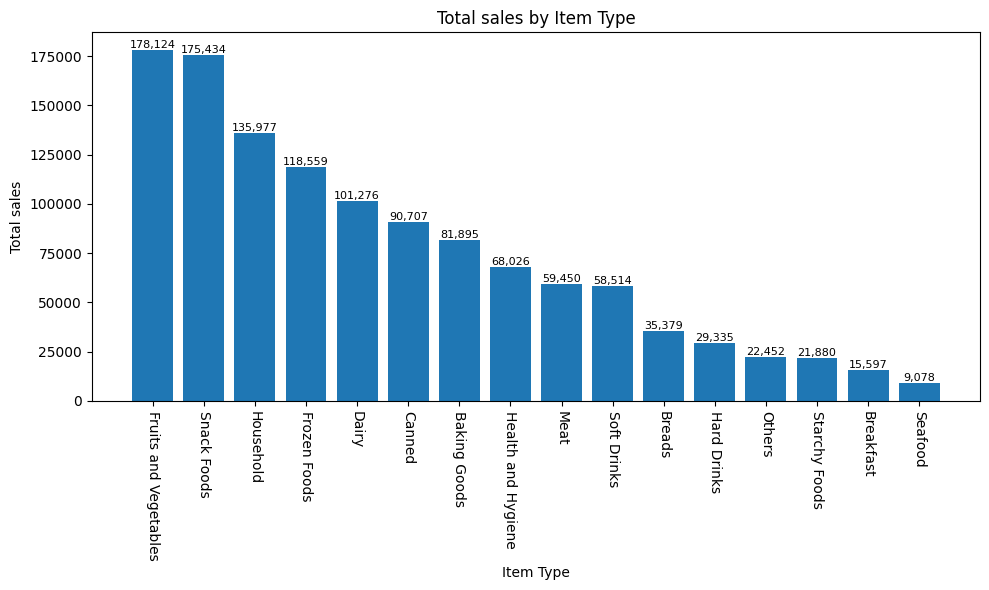

In [54]:
sales_by_type= df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
bars = plt.bar(sales_by_type.index,sales_by_type.values)
plt.xticks(rotation =-90) #y this -90 , you can see clearly column names in bar chart 
plt.xlabel('Item Type')
plt.ylabel('Total sales')
plt.title("Total sales by Item Type")

for bar in bars:
    plt.text(bar.get_x()+bar.get_width()/2,bar.get_height(),
             f'{bar.get_height():,.0f}', ha='center',va='bottom',fontsize=8)
plt.tight_layout()
plt.show()

#### Fat Content by Outlet for total Sales

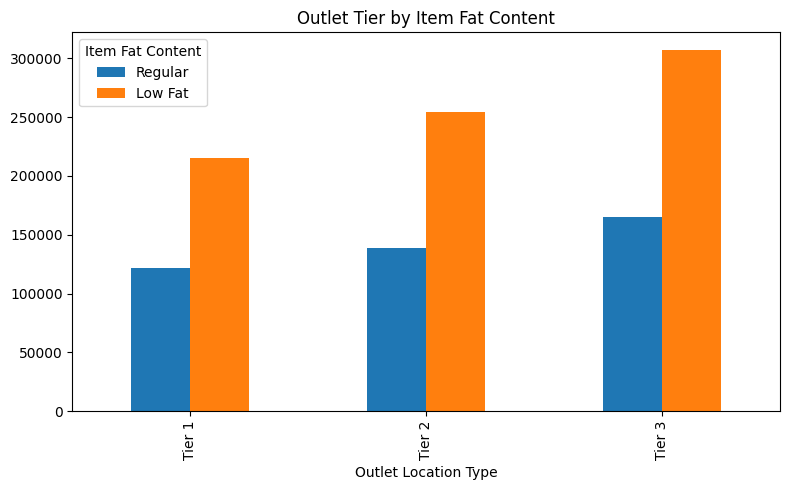

In [55]:
grouped = df.groupby(['Outlet Location Type','Item Fat Content'])['Sales'].sum().unstack()
grouped = grouped[['Regular','Low Fat']]

ax= grouped.plot(kind='bar' ,figsize=(8,5), title='Outlet Tier by Item Fat Content')
plt.tight_layout()
plt.show()

#### Total sales by Oytlet Establishment

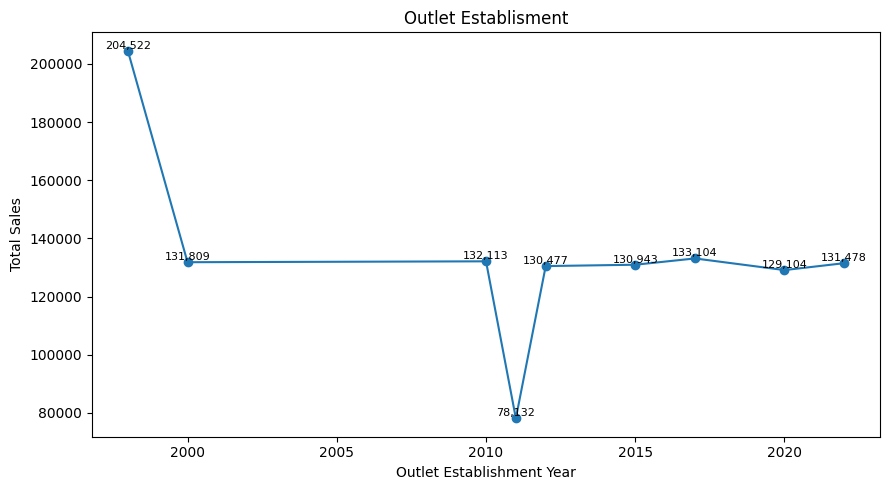

In [59]:
sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()

plt.figure(figsize=(9,5))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o',linestyle='-')


plt.xlabel("Outlet Establishment Year")
plt.ylabel("Total Sales")
plt.title('Outlet Establisment')

# for statement id used here for values which is shown on marker 
for x,y in zip(sales_by_year.index, sales_by_year.values):
    plt.text(x,y,f'{y:,.0f}', ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.show()


#### **sales by Oytlet Size**

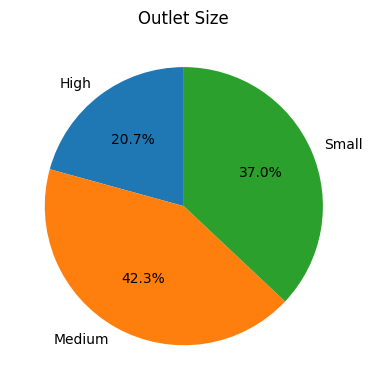

In [62]:
sales_by_size = df.groupby('Outlet Size')['Sales'].sum()

plt.figure(figsize=(4,4))
plt.pie(sales_by_size, labels = sales_by_size.index, autopct= '%1.1f%%', startangle =90)
plt.title('Outlet Size')
plt.tight_layout()
plt.show()

#### Sales by Outlet Location

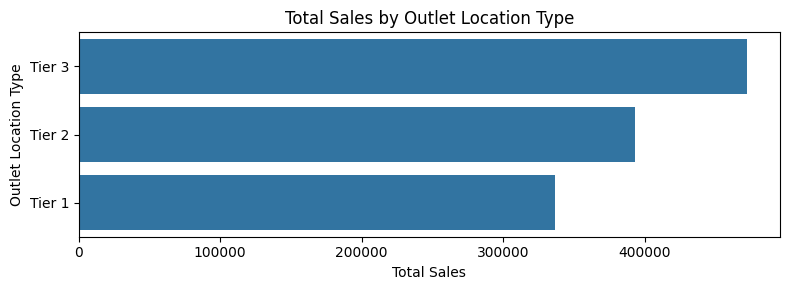

In [63]:
sales_by_location = df.groupby('Outlet Location Type')['Sales'].sum().reset_index()
sales_by_location = sales_by_location.sort_values('Sales', ascending=False)
plt.figure(figsize=(8,3)) 
ax= sns.barplot(x='Sales', y='Outlet Location Type', data=sales_by_location)

plt.title('Total Sales by Outlet Location Type')
plt.xlabel('Total Sales')
plt.ylabel('Outlet Location Type')

plt.tight_layout()
plt.show()